In [1]:
!pip install scikit-image PyMuPDF python-docx opencv-python scipy torch torchvision==0.2.1 pillow==8.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 M

Restart the kernel

In [1]:
# Downloading the Dataset on collab/local notebook

!gdown http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g  # Downloading link for Ancient Text
!gdown http://drive.google.com/uc?id=1YTaqNoZCYP74AuQxlyJsiQLhcoc8DNSv  # Downloading link for Ground Truth Text
# !gdown http://drive.google.com/uc?id=1Z7gLMilfaOVk4eXdqmtFS4JAiDpjy8y6  # Downloading link for Requirements.txt

Downloading...
From: http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g
To: /content/Padilla - Nobleza virtuosa_testExtract.pdf
100% 2.58M/2.58M [00:00<00:00, 124MB/s]
Downloading...
From: http://drive.google.com/uc?id=1YTaqNoZCYP74AuQxlyJsiQLhcoc8DNSv
To: /content/Padilla - 1 Nobleza virtuosa_testTranscription.docx
100% 29.1k/29.1k [00:00<00:00, 58.4MB/s]


In [2]:
!ls

 BoundBoxApplied   imgsUnProcessed					  sample_data
 HumanAI	  'Padilla - 1 Nobleza virtuosa_testTranscription.docx'
 imgsForAllPages  'Padilla - Nobleza virtuosa_testExtract.pdf'


In [3]:
#Converting pdf to images

import fitz  # PyMuPDF
import os

def pdf_to_images(pdf_path, output_folder):
    # Open the PDF
    pdf_document = fitz.open(pdf_path)

    # Iterate over each page in the PDF
    for page_number in range(len(pdf_document)):
        # Get the page
        page = pdf_document.load_page(page_number)

        # Render the page as a Pixmap
        pixmap = page.get_pixmap()

        # Save the Pixmap as a PNG image
        image_path = os.path.join(output_folder, f'page_{page_number + 1}.png')
        pixmap.save(image_path)

    # Close the PDF
    pdf_document.close()

# Example usage
pdf_path = "./Padilla - Nobleza virtuosa_testExtract.pdf"  # Path to your PDF file
output_folder = "./imgsUnProcessed"  # Output folder to save the images
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
pdf_to_images(pdf_path, output_folder)

In [4]:
#Segregating 2-sided pages into individual pages

import cv2
import os

def split_and_save_image(image_path, output_folder, last_image_number):
  # Read the image
  img = cv2.imread(image_path)

  # Get image width
  _, width, _ = img.shape

  # Determine filename based on width and last image number
  if width < 350:
    filename = f"image_{last_image_number}.png"
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, img)
    last_image_number += 1
  elif width > 450:
    left_half = img[:, :width // 2]
    right_half = img[:, width // 2:]
    filename = f"image_{last_image_number}.png"
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, left_half)
    last_image_number += 1
    filename = f"image_{last_image_number}.png"
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, right_half)
    last_image_number += 1

  return last_image_number

def count_images_in_folder(folder_path):
    # Initialize counter for images
    image_count = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file ends with an image file extension
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            image_count += 1

    return image_count

def process_images(image_folder, output_folder):
  # Initialize image counter, starting from 1
  last_image_number = 1

  # Iterate through all files in the image folder
  for indx in range(count_images_in_folder(image_folder)):
    # Check for image files only
    filename = 'page_' + str(indx+1) + '.png'
    image_path = os.path.join(image_folder, filename)
    print(image_path)
    last_image_number = split_and_save_image(image_path, output_folder, last_image_number)

if __name__ == "__main__":
  image_folder = "./imgsUnProcessed"  # Replace with your image folder path
  output_folder = "./imgsForAllPages"  # Replace with your output folder path
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)
  process_images(image_folder, output_folder)
  print("Image processing complete!")

./imgsUnProcessed/page_1.png
./imgsUnProcessed/page_2.png
./imgsUnProcessed/page_3.png
./imgsUnProcessed/page_4.png
./imgsUnProcessed/page_5.png
./imgsUnProcessed/page_6.png
./imgsUnProcessed/page_7.png
./imgsUnProcessed/page_8.png
./imgsUnProcessed/page_9.png
./imgsUnProcessed/page_10.png
./imgsUnProcessed/page_11.png
./imgsUnProcessed/page_12.png
./imgsUnProcessed/page_13.png
./imgsUnProcessed/page_14.png
./imgsUnProcessed/page_15.png
./imgsUnProcessed/page_16.png
Image processing complete!


In [5]:
!git clone https://github.com/Shashankss1205/HumanAI.git

fatal: destination path 'HumanAI' already exists and is not an empty directory.


In [6]:
# !pip install pillow==8.3.1

In [7]:
!mkdir BoundBoxApplied

mkdir: cannot create directory ‘BoundBoxApplied’: File exists


In [8]:
#It takes ~3-4 mins
!python3 /content/HumanAI/OCR/CRAFT/BoundBoxFunc/test.py --trained_model='/content/HumanAI/OCR/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth'

Loading weights from checkpoint (/content/HumanAI/OCR/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth)
elapsed time : 141.3189172744751s


In [9]:
#Sorting the BB
import os

# Function to process bounding boxes
def process_bounding_boxes(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Parse bounding box coordinates
    bounding_boxes = []
    for line in lines:
        coords = list(map(int, line.strip().split(',')))
        bounding_boxes.append(coords)

    # Sort bounding boxes based on y_min value
    bounding_boxes.sort(key=lambda box: box[1])

    # Group bounding boxes based on difference between max and min y_min values
    grouped_boxes = []
    current_group = []
    for box in bounding_boxes:
        if not current_group:
            current_group.append(box)
        else:
            min_y = min(current_group, key=lambda x: x[1])[1]
            max_y = max(current_group, key=lambda x: x[1])[1]
            if box[1] - min_y <= 10:
                current_group.append(box)
            else:
                grouped_boxes.append(current_group)
                current_group = [box]

    # Append the last group
    if current_group:
        grouped_boxes.append(current_group)

    # Sort each group based on x_min value
    for group in grouped_boxes:
        group.sort(key=lambda box: box[0])

    return grouped_boxes

# Path to the directory containing text files
input_directory = "./BoundBoxApplied"   #Finally change it to BoundBoxApplied
output_directory = "./BoundBoxSorted"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Iterate over each text file in the directory
for filename in os.listdir(input_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(input_directory, filename)
        sorted_bounding_boxes = process_bounding_boxes(file_path)

        # Write sorted bounding boxes to text file in output directory
        output_file_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}_sorted.txt")
        with open(output_file_path, "w") as outfile:
            for group in sorted_bounding_boxes:
                for box in group:
                    outfile.write(','.join(map(str, box)) + '\n')
                outfile.write((';'))


In [10]:
#ground truth to text code
from docx import Document
import string

def remove_punctuation(text):
    # Define a translation table that maps punctuations to None
    translation_table = str.maketrans("", "", string.punctuation)
    # Remove punctuations using translate() method
    return text.translate(translation_table)

def save_pages_to_text(docx_file, output_file):
    document = Document(docx_file)
    all_text = ""
    for paragraph in document.paragraphs:
        text = paragraph.text.strip()
        # Remove punctuations from the text before appending to the all_text variable
        text_without_punctuation = remove_punctuation(text)
        # Check if the line starts with "PDF p"
        if not text.startswith("PDF p"):
            all_text += text_without_punctuation + "\n"

    # Write all_text to the output file
    with open(output_file, "w") as file:
        file.write(all_text)

# Example usage:
docx_file = "/content/Padilla - 1 Nobleza virtuosa_testTranscription.docx"  # Replace with the path to your DOCX file
output_file = "/content/all_text.txt"     # File where the text will be saved
save_pages_to_text(docx_file, output_file)


In [11]:
#splitting text files, throws error for 27 onwards files
import os
!mkdir textSplitted

def count_textfiles_in_folder(folder_path):
    # Initialize counter for textfiles
    textfile_count = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file ends with an textfile file extension
        if filename.lower().endswith((".txt")):
            textfile_count += 1

    return textfile_count

def count_occurrences_of_semicolon(filename):
    with open(filename, 'r') as file:
        content = file.read()
        return content.count(';')

def read_nth_line(file_path, n):
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            if i == n - 1:
                return line.rstrip('\n')  # Remove newline character from the end of the line
    return None

def process_textfiles(textfile, sorted_BoundBox_folder, output_folder):
  # Initialize textfile counter, starting from 1
  last_textfile_number = 7
  print(count_textfiles_in_folder(sorted_BoundBox_folder))
  # Iterate through all files in the textfile folder
  for indx in range(count_textfiles_in_folder(sorted_BoundBox_folder)-6):   # 6 pages left for testing
    # Check for textfile files only
    filename = 'res_image_' + str(indx+1) + '_sorted.txt'
    output_file = os.path.join(output_folder, 'res_image_' + str(indx+1) + '_actual.txt')
    res_image_sorted_path = os.path.join(sorted_BoundBox_folder, filename)
    print(res_image_sorted_path)
    occurrences = count_occurrences_of_semicolon(res_image_sorted_path) - 2
    with open(output_file, 'w') as output:
        for eachline in range(occurrences):
            content = read_nth_line(textfile, eachline+last_textfile_number)
            output.write(content + '\n')
    last_textfile_number = last_textfile_number + occurrences


if __name__ == "__main__":
  textfile = '/content/all_text.txt'
  sorted_BoundBox_folder = '/content/BoundBoxSorted'
  output_folder = "/content/textSplitted"  # Replace with your output folder path
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)
  process_textfiles(textfile, sorted_BoundBox_folder, output_folder)
  print("Text splitting complete!")


31
/content/BoundBoxSorted/res_image_1_sorted.txt
/content/BoundBoxSorted/res_image_2_sorted.txt
/content/BoundBoxSorted/res_image_3_sorted.txt
/content/BoundBoxSorted/res_image_4_sorted.txt
/content/BoundBoxSorted/res_image_5_sorted.txt
/content/BoundBoxSorted/res_image_6_sorted.txt
/content/BoundBoxSorted/res_image_7_sorted.txt
/content/BoundBoxSorted/res_image_8_sorted.txt
/content/BoundBoxSorted/res_image_9_sorted.txt
/content/BoundBoxSorted/res_image_10_sorted.txt
/content/BoundBoxSorted/res_image_11_sorted.txt
/content/BoundBoxSorted/res_image_12_sorted.txt
/content/BoundBoxSorted/res_image_13_sorted.txt
/content/BoundBoxSorted/res_image_14_sorted.txt
/content/BoundBoxSorted/res_image_15_sorted.txt
/content/BoundBoxSorted/res_image_16_sorted.txt
/content/BoundBoxSorted/res_image_17_sorted.txt
/content/BoundBoxSorted/res_image_18_sorted.txt
/content/BoundBoxSorted/res_image_19_sorted.txt
/content/BoundBoxSorted/res_image_20_sorted.txt
/content/BoundBoxSorted/res_image_21_sorted.tx

In [12]:
import cv2
import os

def count_files_in_folder(folder_path):
    # Initialize counter for files
    file_count = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file ends with an file file extension
        if filename.lower().endswith((".txt")):
            file_count += 1
    print(file_count)
    return file_count

def extract_bounding_boxes(image_path, bounding_boxes_file, text_file, output_folder):
    # Read the main image
    main_image = cv2.imread(image_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read bounding box coordinates from the text file
    with open(bounding_boxes_file, 'r') as f:
        bounding_boxes_data = f.read().split(';')
    bounding_boxes_data = bounding_boxes_data[1:]
    print(bounding_boxes_data) #first value is for page number so skip it
    # Read text data from the text file
    with open(text_file, 'r') as f:
        text_data = f.read().split('\n')
    print(text_data)

    for indx in range(len(text_data)):
        words = text_data[indx].split(' ')
        print(words)
        bounding_box_coords = bounding_boxes_data[indx].strip().split('\n')
        print(bounding_box_coords)
        for cnt in range(min(len(words),len(bounding_box_coords))):
            coordinates_list = [int(coord) for coord in bounding_box_coords[cnt].split(',')]
            x_min, y_min, x_max, y_min, x_max, y_max, x_min, y_max = coordinates_list

            # Extract the bounding box from the main image
            bounding_box = main_image[y_min:y_max, x_min:x_max]

            # Save the bounding box as a separate image
            output_path = os.path.join(output_folder, f'{words[cnt]}.png')
            cv2.imwrite(output_path, bounding_box)

            print(f'Saved bounding box for "{words[cnt]}" as {output_path}')

def apply_extraction_to_folder(image_folder, bounding_box_folder, text_folder, output_folder):
    # Iterate over each image in the image folder
    # for image_filename in os.listdir(image_folder):
    for image in range(count_files_in_folder(image_folder)- 6): #last 6 pages are for testing
        image_filename = 'res_image_' + str(image+1) + '.jpg'
        print(image_filename)
        if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
            # Get the shared number before the extension
            image_base_name = os.path.splitext(image_filename)[0]
            bounding_box_filename = image_base_name + '_sorted.txt'
            text_filename = image_base_name + '_actual.txt'
            # Check if the corresponding bounding box file exists
            bounding_box_path = os.path.join(bounding_box_folder, bounding_box_filename)
            actual_text_path = os.path.join(text_folder, text_filename)
            if os.path.exists(bounding_box_path):
                image_path = os.path.join(image_folder, image_filename)
                # Apply bounding box extraction to each image
                extract_bounding_boxes(image_path, bounding_box_path, actual_text_path, output_folder)
            else:
                print(f'Bounding box file for {image_filename} does not exist.')

# Example usage
image_folder = '/content/BoundBoxApplied'
bounding_box_folder = '/content/BoundBoxSorted'
text_folder = '/content/textSplitted'
!mkdir output
output_folder = '/content/output'
apply_extraction_to_folder(image_folder, bounding_box_folder, text_folder, output_folder)


31
res_image_1.jpg
['33,48,217,48,217,68,33,68\n', '33,74,58,74,58,92,33,92\n66,73,102,73,102,90,66,90\n109,72,220,74,219,95,109,93\n', '32,100,60,100,60,116,32,116\n62,96,98,96,98,113,62,113\n100,96,108,96,108,112,100,112\n109,96,130,96,130,112,109,112\n132,96,165,96,165,117,132,117\n192,97,220,97,220,117,192,117\n', '32,120,93,120,93,134,32,134\n100,120,126,120,126,133,100,133\n130,121,164,118,166,135,132,138\n169,117,217,117,217,132,169,132\n', '32,136,76,136,76,152,32,152\n81,136,109,140,107,155,79,151\n108,140,134,140,134,152,108,152\n140,137,158,137,158,152,140,152\n164,138,174,138,174,152,164,152\n174,136,212,136,212,157,174,157\n', '53,160,78,160,78,173,53,173\n80,160,105,160,105,176,80,176\n103,158,147,153,149,171,105,176\n150,157,200,157,200,176,150,176\n', '73,180,96,180,96,192,73,192\n97,176,112,176,112,192,97,192\n113,176,158,176,158,192,113,192\n161,177,177,177,177,192,161,192\n', '96,194,156,196,155,213,95,211\n', '112,229,134,229,134,242,112,242\n137,230,152,230,152,242

In [13]:
import cv2
import os

def count_files_in_folder(folder_path):
    # Initialize counter for files
    file_count = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file ends with an file file extension
        if filename.lower().endswith((".txt")):
            file_count += 1
    return file_count

def extract_bounding_boxes(image_path, bounding_boxes_file, output_folder, word):
    # Read the main image
    main_image = cv2.imread(image_path)
    print(image_path)
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read bounding box coordinates from the text file
    with open(bounding_boxes_file, 'r') as f:
        bounding_boxes_data = f.read().split(';')
    bounding_boxes_data = bounding_boxes_data[1:]

    for indx in range(len(bounding_boxes_data)-1):
        bounding_box_coords = bounding_boxes_data[indx].strip().split('\n')
        for cnt in range(len(bounding_box_coords)):
            coordinates_list = [int(coord) for coord in bounding_box_coords[cnt].split(',')]
            x_min, y_min, x_max, y_min, x_max, y_max, x_min, y_max = coordinates_list

            # Extract the bounding box from the main image
            bounding_box = main_image[y_min:y_max, x_min:x_max]

            # Save the bounding box as a separate image
            output_path = os.path.join(output_folder, f'{word}.png')
            cv2.imwrite(output_path, bounding_box)

            print(f'Saved bounding box for "{word}" as {output_path}')
            word += 1

    return word

def apply_extraction_to_folder(image_folder, bounding_box_folder, output_folder, word):
    for image in range(count_files_in_folder(image_folder) - 25):
        image_filename = 'res_image_' + str(image+26) + '.jpg'
        if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
            image_base_name = os.path.splitext(image_filename)[0]
            print(image_base_name)
            bounding_box_filename = image_base_name + '_sorted.txt'
            bounding_box_path = os.path.join(bounding_box_folder, bounding_box_filename)
            if os.path.exists(bounding_box_path):
                image_path = os.path.join(image_folder, image_filename)
                word = extract_bounding_boxes(image_path, bounding_box_path, output_folder, word)
            else:
                print(f'Bounding box file for {image_filename} does not exist.')

image_folder = '/content/BoundBoxApplied'
bounding_box_folder = '/content/BoundBoxSorted'
word = 0
output_folder = '/content/outputTest'
apply_extraction_to_folder(image_folder, bounding_box_folder, output_folder, word)

res_image_26
/content/BoundBoxApplied/res_image_26.jpg
Saved bounding box for "0" as /content/outputTest/0.png
Saved bounding box for "1" as /content/outputTest/1.png
Saved bounding box for "2" as /content/outputTest/2.png
Saved bounding box for "3" as /content/outputTest/3.png
Saved bounding box for "4" as /content/outputTest/4.png
Saved bounding box for "5" as /content/outputTest/5.png
Saved bounding box for "6" as /content/outputTest/6.png
Saved bounding box for "7" as /content/outputTest/7.png
Saved bounding box for "8" as /content/outputTest/8.png
Saved bounding box for "9" as /content/outputTest/9.png
Saved bounding box for "10" as /content/outputTest/10.png
Saved bounding box for "11" as /content/outputTest/11.png
Saved bounding box for "12" as /content/outputTest/12.png
Saved bounding box for "13" as /content/outputTest/13.png
Saved bounding box for "14" as /content/outputTest/14.png
Saved bounding box for "15" as /content/outputTest/15.png
Saved bounding box for "16" as /conte

In [14]:
import os
import csv

def create_csv_from_folder(folder_path, csv_file_path):
    # Get a list of all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Create or overwrite the CSV file
    with open(csv_file_path, 'w', newline='') as csv_file:
        # Create a CSV writer object
        csv_writer = csv.writer(csv_file)

        # Write the header row
        csv_writer.writerow(['FILENAME', 'IDENTITY'])

        # Write data rows, excluding files with the name ".png"
        for file_name in files:
            if file_name.lower() == ".png":
                continue  # Skip files with the name ".png"

            # file_path = os.path.join(folder_path, file_name)

            # Remove the file extension (assuming it's three characters long, like '.png')
            file_name_without_extension = os.path.splitext(file_name)[0]

            csv_writer.writerow([file_name, file_name_without_extension])

    print(f'CSV file "{csv_file_path}" created successfully.')

# Example usage
folder_path = "./output"  # Use raw string or double backslashes
csv_file_path = './outputs.csv'  # Use raw string or double backslashes
create_csv_from_folder(folder_path, csv_file_path)

CSV file "./outputs.csv" created successfully.


In [15]:
import os
import csv

def count_files_in_folder(folder_path):
    # Initialize counter for files
    file_count = 0

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file ends with a ".txt" extension
        if filename.lower().endswith(".png"):
            file_count += 1
    return file_count

def create_csv_from_folder(folder_path, csv_file_path):
    # Get a list of all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Create or overwrite the CSV file
    with open(csv_file_path, 'w', newline='') as csv_file:
        # Create a CSV writer object
        csv_writer = csv.writer(csv_file)

        # Write the header row
        csv_writer.writerow(['FILENAME', 'IDENTITY'])

        # Write data rows
        for count in range(count_files_in_folder(folder_path)):
            # Construct filename (e.g., "1.png", "2.png", etc.)
            filename = str(count) + ".png"
            # Write filename and identity to the CSV file
            csv_writer.writerow([filename, count])

    print(f'CSV file "{csv_file_path}" created successfully.')

# Example usage
folder_path = "./outputTest"  # Use raw string or double backslashes
csv_file_path = './outputsTest.csv'  # Use raw string or double backslashes
create_csv_from_folder(folder_path, csv_file_path)


CSV file "./outputsTest.csv" created successfully.


In [16]:
# Common
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras import layers

In [17]:
# Image Size
IMG_WIDTH = 200
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 200

# Model Name
MODEL_NAME = 'Handwritten-OCR'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths
train_csv_path = '/content/outputs.csv'
# valid_csv_path = '/kaggle/input/handwriting-recognitionocr/CSV/written_name_validation.csv'
test_csv_path = '/content/outputsTest.csv'

train_image_dir = '/content/output'
# valid_image_dir = '/kaggle/input/handwriting-recognitionocr/validation_v2/validation'
test_image_dir = '/content/outputTest'

# Data Size
TRAIN_SIZE = BATCH_SIZE * 1000
VALID_SIZE = BATCH_SIZE * 500
TEST_SIZE  = BATCH_SIZE * 100

# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

In [18]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)[:TRAIN_SIZE]

# Validation CSV
# valid_csv = pd.read_csv(valid_csv_path)[:VALID_SIZE]

# Test CSV
test_csv = pd.read_csv(test_csv_path)[:TEST_SIZE]

In [19]:
test_csv.head()

,FILENAME,IDENTITY
0,0.png,0
1,1.png,1
2,2.png,2
3,3.png,3
4,4.png,4


In [20]:
# In order to convert int to string to prevent tf error
test_csv['IDENTITY'] = test_csv['IDENTITY'].apply(lambda x: str(x))

In [21]:
train_csv.head()

,FILENAME,IDENTITY
0,cumplieredes.png,cumplieredes
1,cación.png,cación
2,recto.png,recto
3,busca.png,busca
4,mildad.png,mildad


In [22]:
# train_csv['IDENTITY'] = train_csv['IDENTITY'].apply(lambda x: x.split('_')[0])

In [23]:
# train_csv.head()

In [24]:
# Get all train labels
train_labels = [str(word) for word in train_csv['IDENTITY'].to_numpy()]
train_labels[:10]

['cumplieredes',
 'cación',
 'recto',
 'busca',
 'mildad',
 'sabiduria',
 'tocar',
 'Caton',
 'virtuosa',
 'Oficios']

In [25]:
# Unique characters
unique_chars = set(char for word in train_labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 52
Unique Characters : 
{'x', 'I', 'S', 'L', 'm', 'z', 'E', 'c', 'U', 'r', 'l', 'f', 'P', 'é', 'á', 'A', 'G', 'C', 'a', 'j', 'R', 'g', 'o', 'h', 'ú', 'Y', 'D', 'F', 'd', 'y', 't', 'Q', 'ó', 'V', 'v', 'q', 'H', 'n', 'B', 'T', 'J', 'u', 'M', 'N', 'O', 'p', 'i', 'e', 'b', 'ñ', 'í', 's'}


In [26]:
MAX_LABEL_LENGTH = max(map(len, train_labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 16


In [27]:
train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
# valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [28]:
test_csv.head()

,FILENAME,IDENTITY
0,/content/outputTest/0.png,0
1,/content/outputTest/1.png,1
2,/content/outputTest/2.png,2
3,/content/outputTest/3.png,3
4,/content/outputTest/4.png,4


In [29]:
train_csv.head()

,FILENAME,IDENTITY
0,/content/output/cumplieredes.png,cumplieredes
1,/content/output/cación.png,cación
2,/content/output/recto.png,recto
3,/content/output/busca.png,busca
4,/content/output/mildad.png,mildad


In [30]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

In [31]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

In [32]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

In [33]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(1000).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Validation data
# valid_ds = tf.data.Dataset.from_tensor_slices(
#     (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
# ).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [34]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
# print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 1312
Testing Data Size    : 864


In [35]:
# resize_images_in_folder(input_folder, output_folder, new_size)
from PIL import Image
import os

def resize_images_in_folder(input_folder, output_folder, new_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            # Open the image
            with Image.open(os.path.join(input_folder, filename)) as img:
                # Resize the image
                resized_img = img.resize(new_size)
                # Save the resized image to the output folder
                output_filename = os.path.splitext(filename)[0] + '.png'  # Ensure output format is PNG
                resized_img.save(os.path.join(output_folder, output_filename))

# Example usage
input_folder = "/content/output"
output_folder = "/content/output"
new_size = (200, 50)  # New size in pixels (width, height)

resize_images_in_folder(input_folder, output_folder, new_size)

In [36]:
from PIL import Image
import os

def resize_images_in_folder(input_folder, output_folder, new_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            # Open the image
            with Image.open(os.path.join(input_folder, filename)) as img:
                # Resize the image
                resized_img = img.resize(new_size)
                # Save the resized image to the output folder
                output_filename = os.path.splitext(filename)[0] + '.png'  # Ensure output format is PNG
                resized_img.save(os.path.join(output_folder, output_filename))

# Example usage
input_folder = "/content/outputTest"
output_folder = "/content/outputTest"
new_size = (200, 50)  # New size in pixels (width, height)

resize_images_in_folder(input_folder, output_folder, new_size)

In [37]:
def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):

    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images, labels)):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\nPred : {pred}"
            plt.title(title)
        else:
            # add title
            plt.title(text_label)

    # Show the final plot
    cls()
    plt.show()

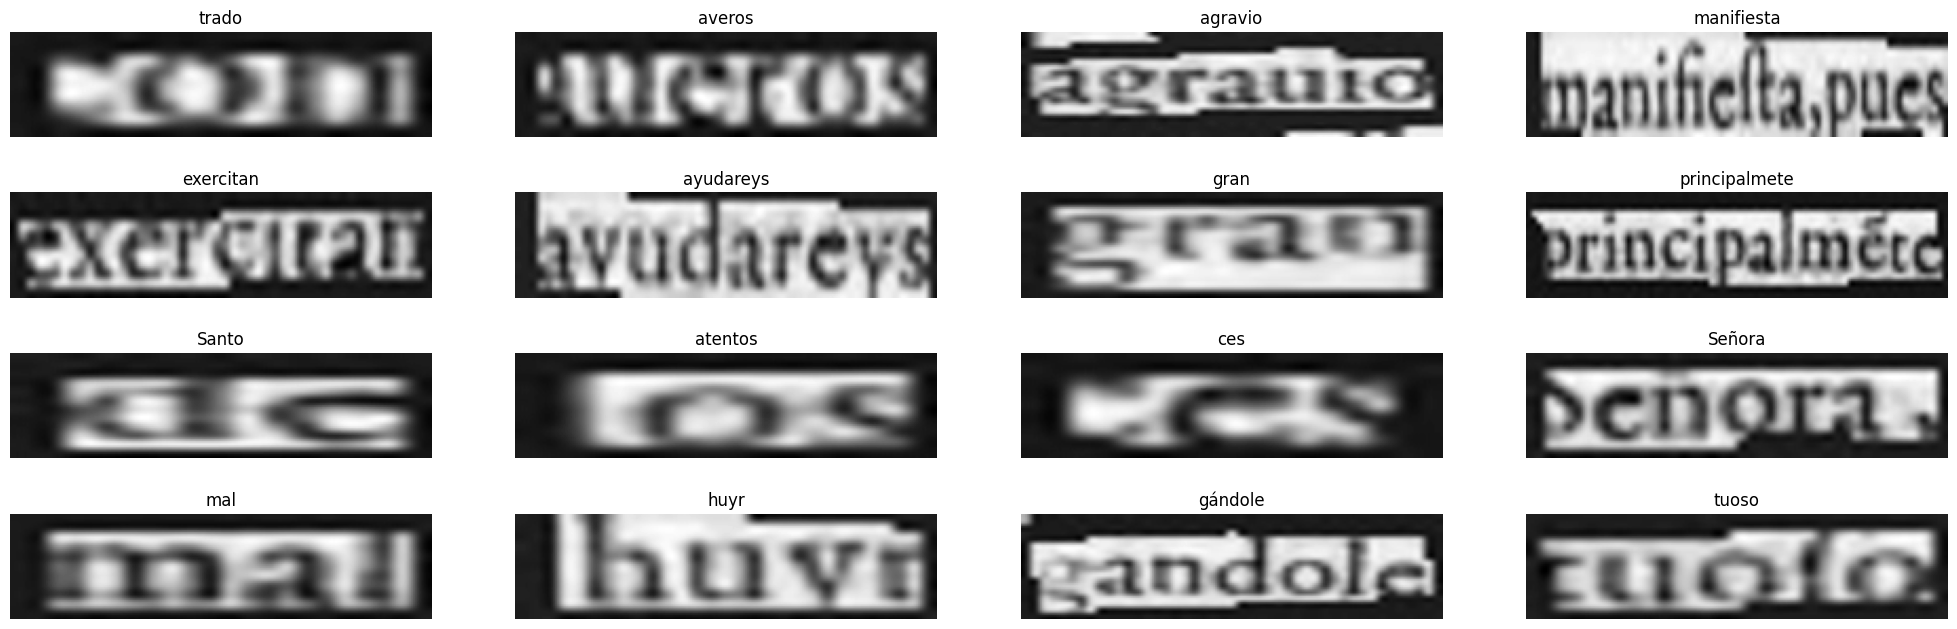

In [38]:
show_images(data=train_ds, cmap='gray')

In [39]:
class CTCLayer(layers.Layer):

    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)

        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):

        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')

        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')

        loss = self.loss_fn(y_true, y_pred, input_len, label_len)

        self.add_loss(loss)

        return y_pred

In [40]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*64))(x)
encoding = layers.Dense(64, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.2)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(encoding)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)


In [41]:
# Model Summary
ocr_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 200, 50, 1)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 200, 50, 32)          320       ['image[0][0]']               
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 100, 25, 32)          0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 100, 25, 64)          18496     ['max_pooling2d[0][0]']   

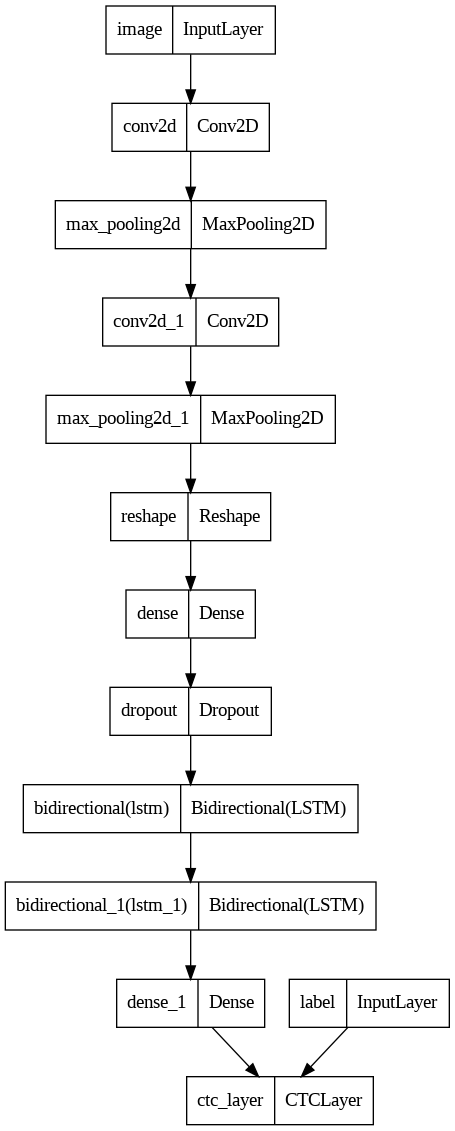

In [42]:
tf.keras.utils.plot_model(ocr_model)

In [43]:
# Compile
ocr_model.compile(optimizer='adam')

# Train
history = ocr_model.fit(
    train_ds,
#     validation_data=valid_ds,
    epochs=EPOCHS,
    callbacks=CALLBACKS
)

Epoch 1/200
82/82 [==============================] - ETA: 0s - loss: 25.8364

82/82 [==============================] - 15s 33ms/step - loss: 25.8364
Epoch 2/200
82/82 [==============================] - ETA: 0s - loss: 20.3703

82/82 [==============================] - 2s 29ms/step - loss: 20.3703
Epoch 3/200
81/82 [============================>.] - ETA: 0s - loss: 20.0457

82/82 [==============================] - 2s 30ms/step - loss: 20.0533
Epoch 4/200
81/82 [============================>.] - ETA: 0s - loss: 19.8723

82/82 [==============================] - 3s 31ms/step - loss: 19.8796
Epoch 5/200
81/82 [============================>.] - ETA: 0s - loss: 19.7180

82/82 [==============================] - 3s 42ms/step - loss: 19.7033
Epoch 6/200
81/82 [============================>.] - ETA: 0s - loss: 19.5212

82/82 [==============================] - 3s 32ms/step - loss: 19.5228
Epoch 7/200
81/82 [============================>.] - ETA: 0s - loss: 19.4392

82/82 [==============================] - 2s 30ms/step - loss: 19.4482
Epoch 8/200
82/82 [==============================] - ETA: 0s - loss: 19.3709

82/82 [==============================] - 3s 36ms/step - loss: 19.3709
Epoch 9/200
81/82 [============================>.] - ETA: 0s - loss: 19.2874

82/82 [==============================] - 3s 31ms/step - loss: 19.2899
Epoch 10/200
82/82 [==============================] - ETA: 0s - loss: 19.1819

82/82 [==============================] - 2s 30ms/step - loss: 19.1819
Epoch 11/200
82/82 [==============================] - ETA: 0s - loss: 19.1248

82/82 [==============================] - 2s 30ms/step - loss: 19.1248
Epoch 12/200
82/82 [==============================] - ETA: 0s - loss: 19.0727

82/82 [==============================] - 3s 42ms/step - loss: 19.0727
Epoch 13/200
82/82 [==============================] - ETA: 0s - loss: 18.9860

82/82 [==============================] - 3s 31ms/step - loss: 18.9860
Epoch 14/200
81/82 [============================>.] - ETA: 0s - loss: 18.9523

82/82 [==============================] - 3s 32ms/step - loss: 18.9353
Epoch 15/200
81/82 [============================>.] - ETA: 0s - loss: 18.8601

82/82 [==============================] - 3s 33ms/step - loss: 18.8588
Epoch 16/200
81/82 [============================>.] - ETA: 0s - loss: 18.7755

82/82 [==============================] - 3s 31ms/step - loss: 18.7669
Epoch 17/200
82/82 [==============================] - ETA: 0s - loss: 18.6776

82/82 [==============================] - 3s 31ms/step - loss: 18.6776
Epoch 18/200
82/82 [==============================] - ETA: 0s - loss: 18.5917

82/82 [==============================] - 3s 38ms/step - loss: 18.5917
Epoch 19/200
82/82 [==============================] - ETA: 0s - loss: 18.5121

82/82 [==============================] - 3s 31ms/step - loss: 18.5121
Epoch 20/200
80/82 [============================>.] - ETA: 0s - loss: 18.4732

82/82 [==============================] - 3s 31ms/step - loss: 18.4328
Epoch 21/200
81/82 [============================>.] - ETA: 0s - loss: 18.4042

82/82 [==============================] - 4s 46ms/step - loss: 18.4054
Epoch 22/200
82/82 [==============================] - ETA: 0s - loss: 18.3323

82/82 [==============================] - 3s 32ms/step - loss: 18.3323
Epoch 23/200
81/82 [============================>.] - ETA: 0s - loss: 18.2376

82/82 [==============================] - 3s 33ms/step - loss: 18.2331
Epoch 24/200
82/82 [==============================] - ETA: 0s - loss: 18.1768

82/82 [==============================] - 3s 42ms/step - loss: 18.1768
Epoch 25/200
82/82 [==============================] - ETA: 0s - loss: 18.1182

82/82 [==============================] - 3s 33ms/step - loss: 18.1182
Epoch 26/200
80/82 [============================>.] - ETA: 0s - loss: 18.0508

82/82 [==============================] - 3s 32ms/step - loss: 18.0420
Epoch 27/200
81/82 [============================>.] - ETA: 0s - loss: 17.9054

82/82 [==============================] - 4s 46ms/step - loss: 17.9063
Epoch 28/200
82/82 [==============================] - ETA: 0s - loss: 17.8405

82/82 [==============================] - 3s 31ms/step - loss: 17.8405
Epoch 29/200
81/82 [============================>.] - ETA: 0s - loss: 17.7691

82/82 [==============================] - 3s 32ms/step - loss: 17.7634
Epoch 30/200
80/82 [============================>.] - ETA: 0s - loss: 17.7345

82/82 [==============================] - 3s 34ms/step - loss: 17.7389
Epoch 31/200
82/82 [==============================] - ETA: 0s - loss: 17.5822

82/82 [==============================] - 3s 32ms/step - loss: 17.5822
Epoch 32/200
82/82 [==============================] - ETA: 0s - loss: 17.5292

82/82 [==============================] - 4s 45ms/step - loss: 17.5292
Epoch 33/200
82/82 [==============================] - ETA: 0s - loss: 17.3895

82/82 [==============================] - 3s 31ms/step - loss: 17.3895
Epoch 34/200
82/82 [==============================] - ETA: 0s - loss: 17.2774

82/82 [==============================] - 2s 30ms/step - loss: 17.2774
Epoch 35/200
81/82 [============================>.] - ETA: 0s - loss: 17.2230

82/82 [==============================] - 3s 31ms/step - loss: 17.2146
Epoch 36/200
82/82 [==============================] - ETA: 0s - loss: 17.0333

82/82 [==============================] - 3s 40ms/step - loss: 17.0333
Epoch 37/200
80/82 [============================>.] - ETA: 0s - loss: 17.0224

82/82 [==============================] - 3s 35ms/step - loss: 16.9972
Epoch 38/200
81/82 [============================>.] - ETA: 0s - loss: 16.7458

82/82 [==============================] - 3s 33ms/step - loss: 16.7679
Epoch 39/200
82/82 [==============================] - ETA: 0s - loss: 16.6375

82/82 [==============================] - 4s 45ms/step - loss: 16.6375
Epoch 40/200
82/82 [==============================] - ETA: 0s - loss: 16.5284

82/82 [==============================] - 3s 32ms/step - loss: 16.5284
Epoch 41/200
82/82 [==============================] - ETA: 0s - loss: 16.3824

82/82 [==============================] - 3s 33ms/step - loss: 16.3824
Epoch 42/200
82/82 [==============================] - ETA: 0s - loss: 16.1583

82/82 [==============================] - 3s 41ms/step - loss: 16.1583
Epoch 43/200
82/82 [==============================] - ETA: 0s - loss: 15.9727

82/82 [==============================] - 3s 34ms/step - loss: 15.9727
Epoch 44/200
82/82 [==============================] - ETA: 0s - loss: 15.7675

82/82 [==============================] - 3s 32ms/step - loss: 15.7675
Epoch 45/200
82/82 [==============================] - ETA: 0s - loss: 15.6518

82/82 [==============================] - 3s 31ms/step - loss: 15.6518
Epoch 46/200
80/82 [============================>.] - ETA: 0s - loss: 15.2926

82/82 [==============================] - 4s 45ms/step - loss: 15.3105
Epoch 47/200
82/82 [==============================] - ETA: 0s - loss: 15.0921

82/82 [==============================] - 3s 31ms/step - loss: 15.0921
Epoch 48/200
81/82 [============================>.] - ETA: 0s - loss: 14.8723

82/82 [==============================] - 3s 32ms/step - loss: 14.8796
Epoch 49/200
82/82 [==============================] - ETA: 0s - loss: 14.6823

82/82 [==============================] - 3s 40ms/step - loss: 14.6823
Epoch 50/200
82/82 [==============================] - ETA: 0s - loss: 14.3870

82/82 [==============================] - 3s 32ms/step - loss: 14.3870
Epoch 51/200
82/82 [==============================] - ETA: 0s - loss: 14.3488

82/82 [==============================] - 3s 32ms/step - loss: 14.3488
Epoch 52/200
81/82 [============================>.] - ETA: 0s - loss: 14.0389

82/82 [==============================] - 3s 34ms/step - loss: 14.0469
Epoch 53/200
82/82 [==============================] - ETA: 0s - loss: 13.6690

82/82 [==============================] - 3s 33ms/step - loss: 13.6690
Epoch 54/200
80/82 [============================>.] - ETA: 0s - loss: 13.3889

82/82 [==============================] - 4s 43ms/step - loss: 13.3807
Epoch 55/200
81/82 [============================>.] - ETA: 0s - loss: 13.1923

82/82 [==============================] - 3s 32ms/step - loss: 13.1882
Epoch 56/200
81/82 [============================>.] - ETA: 0s - loss: 13.0126

82/82 [==============================] - 3s 32ms/step - loss: 13.0065
Epoch 57/200
81/82 [============================>.] - ETA: 0s - loss: 12.9350

82/82 [==============================] - 4s 45ms/step - loss: 12.9410
Epoch 58/200
81/82 [============================>.] - ETA: 0s - loss: 12.5767

82/82 [==============================] - 3s 32ms/step - loss: 12.5801
Epoch 59/200
81/82 [============================>.] - ETA: 0s - loss: 12.2131

82/82 [==============================] - 3s 32ms/step - loss: 12.2088
Epoch 60/200
82/82 [==============================] - ETA: 0s - loss: 12.0411

82/82 [==============================] - 3s 32ms/step - loss: 12.0411
Epoch 61/200
81/82 [============================>.] - ETA: 0s - loss: 11.6932

82/82 [==============================] - 3s 33ms/step - loss: 11.7057
Epoch 62/200
82/82 [==============================] - ETA: 0s - loss: 11.6000

82/82 [==============================] - 3s 31ms/step - loss: 11.6000
Epoch 63/200
82/82 [==============================] - ETA: 0s - loss: 11.2835

82/82 [==============================] - 3s 30ms/step - loss: 11.2835
Epoch 64/200
82/82 [==============================] - ETA: 0s - loss: 10.9792

82/82 [==============================] - 3s 41ms/step - loss: 10.9792
Epoch 65/200
82/82 [==============================] - ETA: 0s - loss: 10.7990

82/82 [==============================] - 3s 32ms/step - loss: 10.7990
Epoch 66/200
82/82 [==============================] - ETA: 0s - loss: 10.5689

82/82 [==============================] - 3s 31ms/step - loss: 10.5689
Epoch 67/200
81/82 [============================>.] - ETA: 0s - loss: 10.3385

82/82 [==============================] - 4s 44ms/step - loss: 10.3319
Epoch 68/200
82/82 [==============================] - ETA: 0s - loss: 10.2664

82/82 [==============================] - 3s 32ms/step - loss: 10.2664
Epoch 69/200
81/82 [============================>.] - ETA: 0s - loss: 9.9718

82/82 [==============================] - 3s 33ms/step - loss: 9.9715
Epoch 70/200
82/82 [==============================] - ETA: 0s - loss: 9.8109

82/82 [==============================] - 3s 33ms/step - loss: 9.8109
Epoch 71/200
82/82 [==============================] - ETA: 0s - loss: 9.4768

82/82 [==============================] - 3s 31ms/step - loss: 9.4768
Epoch 72/200
82/82 [==============================] - ETA: 0s - loss: 9.4088

82/82 [==============================] - 3s 37ms/step - loss: 9.4088
Epoch 73/200
81/82 [============================>.] - ETA: 0s - loss: 9.0635

82/82 [==============================] - 3s 36ms/step - loss: 9.0602
Epoch 74/200
82/82 [==============================] - ETA: 0s - loss: 8.9141

82/82 [==============================] - 3s 32ms/step - loss: 8.9141
Epoch 75/200
82/82 [==============================] - ETA: 0s - loss: 8.7301

82/82 [==============================] - 3s 31ms/step - loss: 8.7301
Epoch 76/200
80/82 [============================>.] - ETA: 0s - loss: 8.5597

82/82 [==============================] - 4s 43ms/step - loss: 8.5657
Epoch 77/200
82/82 [==============================] - ETA: 0s - loss: 8.3648

82/82 [==============================] - 3s 32ms/step - loss: 8.3648
Epoch 78/200
82/82 [==============================] - ETA: 0s - loss: 8.0598

82/82 [==============================] - 3s 32ms/step - loss: 8.0598
Epoch 79/200
80/82 [============================>.] - ETA: 0s - loss: 7.9232

82/82 [==============================] - 3s 40ms/step - loss: 7.9338
Epoch 80/200
82/82 [==============================] - ETA: 0s - loss: 7.7998

82/82 [==============================] - 3s 31ms/step - loss: 7.7998
Epoch 81/200
82/82 [==============================] - ETA: 0s - loss: 7.7591

82/82 [==============================] - 3s 31ms/step - loss: 7.7591
Epoch 82/200
81/82 [============================>.] - ETA: 0s - loss: 7.4837

82/82 [==============================] - 3s 31ms/step - loss: 7.4923
Epoch 83/200
82/82 [==============================] - ETA: 0s - loss: 7.2965

82/82 [==============================] - 3s 32ms/step - loss: 7.2965
Epoch 84/200
82/82 [==============================] - ETA: 0s - loss: 7.1871

82/82 [==============================] - 3s 32ms/step - loss: 7.1871
Epoch 85/200
82/82 [==============================] - ETA: 0s - loss: 7.0020

82/82 [==============================] - 3s 40ms/step - loss: 7.0020
Epoch 86/200
81/82 [============================>.] - ETA: 0s - loss: 6.9112

82/82 [==============================] - 3s 32ms/step - loss: 6.9179
Epoch 87/200
82/82 [==============================] - ETA: 0s - loss: 6.6106

82/82 [==============================] - 3s 32ms/step - loss: 6.6106
Epoch 88/200
82/82 [==============================] - ETA: 0s - loss: 6.6300

82/82 [==============================] - 3s 41ms/step - loss: 6.6300
Epoch 89/200
81/82 [============================>.] - ETA: 0s - loss: 6.3096

82/82 [==============================] - 3s 33ms/step - loss: 6.3126
Epoch 90/200
81/82 [============================>.] - ETA: 0s - loss: 6.2788

82/82 [==============================] - 3s 33ms/step - loss: 6.2813
Epoch 91/200
82/82 [==============================] - ETA: 0s - loss: 6.1100

82/82 [==============================] - 3s 33ms/step - loss: 6.1100
Epoch 92/200
81/82 [============================>.] - ETA: 0s - loss: 5.9822

82/82 [==============================] - 4s 44ms/step - loss: 5.9844
Epoch 93/200
82/82 [==============================] - ETA: 0s - loss: 5.8051

82/82 [==============================] - 3s 33ms/step - loss: 5.8051
Epoch 94/200
81/82 [============================>.] - ETA: 0s - loss: 5.8727

82/82 [==============================] - 3s 36ms/step - loss: 5.8763
Epoch 95/200
81/82 [============================>.] - ETA: 0s - loss: 5.7850

82/82 [==============================] - 3s 32ms/step - loss: 5.7813
Epoch 96/200
81/82 [============================>.] - ETA: 0s - loss: 5.6631

82/82 [==============================] - 3s 32ms/step - loss: 5.6597
Epoch 97/200
80/82 [============================>.] - ETA: 0s - loss: 5.4040

82/82 [==============================] - 3s 32ms/step - loss: 5.4059
Epoch 98/200
82/82 [==============================] - ETA: 0s - loss: 5.3359

82/82 [==============================] - 3s 30ms/step - loss: 5.3359
Epoch 99/200
82/82 [==============================] - ETA: 0s - loss: 5.1511

82/82 [==============================] - 3s 31ms/step - loss: 5.1511
Epoch 100/200
82/82 [==============================] - ETA: 0s - loss: 5.1256

82/82 [==============================] - 3s 35ms/step - loss: 5.1256
Epoch 101/200
82/82 [==============================] - ETA: 0s - loss: 4.8420

82/82 [==============================] - 3s 32ms/step - loss: 4.8420
Epoch 102/200
82/82 [==============================] - ETA: 0s - loss: 4.8086

82/82 [==============================] - 3s 30ms/step - loss: 4.8086
Epoch 103/200
82/82 [==============================] - ETA: 0s - loss: 4.8429

82/82 [==============================] - 3s 32ms/step - loss: 4.8429
Epoch 104/200
80/82 [============================>.] - ETA: 0s - loss: 4.6917

82/82 [==============================] - 3s 32ms/step - loss: 4.6859
Epoch 105/200
82/82 [==============================] - ETA: 0s - loss: 4.6703

82/82 [==============================] - 3s 31ms/step - loss: 4.6703
Epoch 106/200
81/82 [============================>.] - ETA: 0s - loss: 4.5612

82/82 [==============================] - 3s 34ms/step - loss: 4.5570
Epoch 107/200
82/82 [==============================] - ETA: 0s - loss: 4.4807

82/82 [==============================] - 3s 32ms/step - loss: 4.4807
Epoch 108/200
81/82 [============================>.] - ETA: 0s - loss: 4.3077

82/82 [==============================] - 3s 31ms/step - loss: 4.3035
Epoch 109/200
82/82 [==============================] - ETA: 0s - loss: 4.1725

82/82 [==============================] - 3s 31ms/step - loss: 4.1725
Epoch 110/200
82/82 [==============================] - ETA: 0s - loss: 4.0480

82/82 [==============================] - 3s 32ms/step - loss: 4.0480
Epoch 111/200
81/82 [============================>.] - ETA: 0s - loss: 4.1262

82/82 [==============================] - 3s 31ms/step - loss: 4.1220
Epoch 112/200
82/82 [==============================] - ETA: 0s - loss: 4.0419

82/82 [==============================] - 3s 35ms/step - loss: 4.0419
Epoch 113/200
82/82 [==============================] - ETA: 0s - loss: 3.9254

82/82 [==============================] - 3s 39ms/step - loss: 3.9254
Epoch 114/200
81/82 [============================>.] - ETA: 0s - loss: 3.8886

82/82 [==============================] - 3s 31ms/step - loss: 3.8870
Epoch 115/200
82/82 [==============================] - ETA: 0s - loss: 3.6985

82/82 [==============================] - 3s 31ms/step - loss: 3.6985
Epoch 116/200
81/82 [============================>.] - ETA: 0s - loss: 3.5867

82/82 [==============================] - 4s 45ms/step - loss: 3.5855
Epoch 117/200
82/82 [==============================] - ETA: 0s - loss: 3.4666

82/82 [==============================] - 3s 31ms/step - loss: 3.4666
Epoch 118/200
82/82 [==============================] - ETA: 0s - loss: 3.4465

82/82 [==============================] - 3s 31ms/step - loss: 3.4465
Epoch 119/200
81/82 [============================>.] - ETA: 0s - loss: 3.3035

82/82 [==============================] - 3s 31ms/step - loss: 3.3063
Epoch 120/200
81/82 [============================>.] - ETA: 0s - loss: 3.2756

82/82 [==============================] - 4s 43ms/step - loss: 3.2721
Epoch 121/200
82/82 [==============================] - ETA: 0s - loss: 3.2440

82/82 [==============================] - 3s 31ms/step - loss: 3.2440
Epoch 122/200
81/82 [============================>.] - ETA: 0s - loss: 3.3881

82/82 [==============================] - 3s 32ms/step - loss: 3.3885
Epoch 123/200
82/82 [==============================] - ETA: 0s - loss: 3.2847

82/82 [==============================] - 3s 35ms/step - loss: 3.2847
Epoch 124/200
82/82 [==============================] - ETA: 0s - loss: 3.0783

82/82 [==============================] - 3s 32ms/step - loss: 3.0783
Epoch 125/200
82/82 [==============================] - ETA: 0s - loss: 3.0224

82/82 [==============================] - 3s 31ms/step - loss: 3.0224
Epoch 126/200
80/82 [============================>.] - ETA: 0s - loss: 2.9141

82/82 [==============================] - 4s 44ms/step - loss: 2.9328
Epoch 127/200
82/82 [==============================] - ETA: 0s - loss: 2.9922

82/82 [==============================] - 3s 32ms/step - loss: 2.9922
Epoch 128/200
82/82 [==============================] - ETA: 0s - loss: 2.9085

82/82 [==============================] - 2s 30ms/step - loss: 2.9085
Epoch 129/200
82/82 [==============================] - ETA: 0s - loss: 2.8382

82/82 [==============================] - 2s 30ms/step - loss: 2.8382
Epoch 130/200
82/82 [==============================] - ETA: 0s - loss: 2.8600

82/82 [==============================] - 3s 33ms/step - loss: 2.8600
Epoch 131/200
82/82 [==============================] - ETA: 0s - loss: 2.7401

82/82 [==============================] - 3s 31ms/step - loss: 2.7401
Epoch 132/200
82/82 [==============================] - ETA: 0s - loss: 2.7021

82/82 [==============================] - 3s 30ms/step - loss: 2.7021
Epoch 133/200
81/82 [============================>.] - ETA: 0s - loss: 2.8043

82/82 [==============================] - 3s 31ms/step - loss: 2.8101
Epoch 134/200
82/82 [==============================] - ETA: 0s - loss: 2.7506

82/82 [==============================] - 3s 31ms/step - loss: 2.7506
Epoch 135/200
81/82 [============================>.] - ETA: 0s - loss: 2.6721

82/82 [==============================] - 3s 31ms/step - loss: 2.6693
Epoch 136/200
80/82 [============================>.] - ETA: 0s - loss: 2.5032

82/82 [==============================] - 3s 42ms/step - loss: 2.4986
Epoch 137/200
82/82 [==============================] - ETA: 0s - loss: 2.4487

82/82 [==============================] - 3s 31ms/step - loss: 2.4487
Epoch 138/200
81/82 [============================>.] - ETA: 0s - loss: 2.4773

82/82 [==============================] - 3s 36ms/step - loss: 2.4750
Epoch 139/200
82/82 [==============================] - ETA: 0s - loss: 2.7256

82/82 [==============================] - 3s 39ms/step - loss: 2.7256
Epoch 140/200
82/82 [==============================] - ETA: 0s - loss: 2.8319

82/82 [==============================] - 3s 31ms/step - loss: 2.8319
Epoch 141/200
82/82 [==============================] - ETA: 0s - loss: 2.3592

82/82 [==============================] - 3s 31ms/step - loss: 2.3592
Epoch 142/200
80/82 [============================>.] - ETA: 0s - loss: 2.4768

82/82 [==============================] - 4s 43ms/step - loss: 2.4722
Epoch 143/200
82/82 [==============================] - ETA: 0s - loss: 2.2703

82/82 [==============================] - 3s 30ms/step - loss: 2.2703
Epoch 144/200
81/82 [============================>.] - ETA: 0s - loss: 2.2555

82/82 [==============================] - 3s 31ms/step - loss: 2.2584
Epoch 145/200
82/82 [==============================] - ETA: 0s - loss: 2.2643

82/82 [==============================] - 3s 31ms/step - loss: 2.2643
Epoch 146/200
82/82 [==============================] - ETA: 0s - loss: 2.2880

82/82 [==============================] - 3s 35ms/step - loss: 2.2880
Epoch 147/200
82/82 [==============================] - ETA: 0s - loss: 2.0601

82/82 [==============================] - 3s 40ms/step - loss: 2.0601
Epoch 148/200
82/82 [==============================] - ETA: 0s - loss: 2.1669

82/82 [==============================] - 3s 31ms/step - loss: 2.1669
Epoch 149/200
82/82 [==============================] - ETA: 0s - loss: 2.0645

82/82 [==============================] - 3s 31ms/step - loss: 2.0645
Epoch 150/200
82/82 [==============================] - ETA: 0s - loss: 2.0586

82/82 [==============================] - 3s 31ms/step - loss: 2.0586
Epoch 151/200
82/82 [==============================] - ETA: 0s - loss: 1.9705

82/82 [==============================] - 3s 31ms/step - loss: 1.9705
Epoch 152/200
81/82 [============================>.] - ETA: 0s - loss: 1.9564

82/82 [==============================] - 3s 31ms/step - loss: 1.9572
Epoch 153/200
82/82 [==============================] - ETA: 0s - loss: 2.0916

82/82 [==============================] - 3s 36ms/step - loss: 2.0916
Epoch 154/200
81/82 [============================>.] - ETA: 0s - loss: 2.0349

82/82 [==============================] - 3s 32ms/step - loss: 2.0366
Epoch 155/200
82/82 [==============================] - ETA: 0s - loss: 2.0250

82/82 [==============================] - 3s 32ms/step - loss: 2.0250
Epoch 156/200
81/82 [============================>.] - ETA: 0s - loss: 2.0044

82/82 [==============================] - 3s 32ms/step - loss: 2.0057
Epoch 157/200
81/82 [============================>.] - ETA: 0s - loss: 2.1176

82/82 [==============================] - 4s 43ms/step - loss: 2.1151
Epoch 158/200
81/82 [============================>.] - ETA: 0s - loss: 2.1133

82/82 [==============================] - 3s 32ms/step - loss: 2.1124
Epoch 159/200
82/82 [==============================] - ETA: 0s - loss: 1.9611

82/82 [==============================] - 3s 32ms/step - loss: 1.9611
Epoch 160/200
82/82 [==============================] - ETA: 0s - loss: 1.9496

82/82 [==============================] - 3s 30ms/step - loss: 1.9496
Epoch 161/200
81/82 [============================>.] - ETA: 0s - loss: 2.0748

82/82 [==============================] - 3s 35ms/step - loss: 2.0754
Epoch 162/200
80/82 [============================>.] - ETA: 0s - loss: 1.8174

82/82 [==============================] - 3s 39ms/step - loss: 1.8226
Epoch 163/200
82/82 [==============================] - ETA: 0s - loss: 1.6962

82/82 [==============================] - 3s 31ms/step - loss: 1.6962
Epoch 164/200
82/82 [==============================] - ETA: 0s - loss: 1.7171

82/82 [==============================] - 3s 31ms/step - loss: 1.7171
Epoch 165/200
81/82 [============================>.] - ETA: 0s - loss: 1.7333

82/82 [==============================] - 4s 45ms/step - loss: 1.7343
Epoch 166/200
82/82 [==============================] - ETA: 0s - loss: 1.6854

82/82 [==============================] - 3s 32ms/step - loss: 1.6854
Epoch 167/200
82/82 [==============================] - ETA: 0s - loss: 1.6414

82/82 [==============================] - 3s 32ms/step - loss: 1.6414
Epoch 168/200
81/82 [============================>.] - ETA: 0s - loss: 1.5969

82/82 [==============================] - 3s 32ms/step - loss: 1.5965
Epoch 169/200
82/82 [==============================] - ETA: 0s - loss: 1.6417

82/82 [==============================] - 3s 31ms/step - loss: 1.6417
Epoch 170/200
81/82 [============================>.] - ETA: 0s - loss: 1.6631

82/82 [==============================] - 3s 39ms/step - loss: 1.6618
Epoch 171/200
80/82 [============================>.] - ETA: 0s - loss: 1.6929

82/82 [==============================] - 3s 36ms/step - loss: 1.7017
Epoch 172/200
81/82 [============================>.] - ETA: 0s - loss: 1.6404

82/82 [==============================] - 3s 31ms/step - loss: 1.6413
Epoch 173/200
82/82 [==============================] - ETA: 0s - loss: 1.6217

82/82 [==============================] - 3s 31ms/step - loss: 1.6217
Epoch 174/200
81/82 [============================>.] - ETA: 0s - loss: 1.7606

82/82 [==============================] - 3s 31ms/step - loss: 1.7595
Epoch 175/200
80/82 [============================>.] - ETA: 0s - loss: 1.6045

82/82 [==============================] - 3s 32ms/step - loss: 1.6020
Epoch 176/200
81/82 [============================>.] - ETA: 0s - loss: 1.4475

82/82 [==============================] - 3s 32ms/step - loss: 1.4480
Epoch 177/200
81/82 [============================>.] - ETA: 0s - loss: 1.4370

82/82 [==============================] - 3s 35ms/step - loss: 1.4377
Epoch 178/200
81/82 [============================>.] - ETA: 0s - loss: 1.4220

82/82 [==============================] - 3s 31ms/step - loss: 1.4219
Epoch 179/200
80/82 [============================>.] - ETA: 0s - loss: 1.4566

82/82 [==============================] - 3s 32ms/step - loss: 1.4598
Epoch 180/200
81/82 [============================>.] - ETA: 0s - loss: 1.5278

82/82 [==============================] - 3s 32ms/step - loss: 1.5270
Epoch 181/200
81/82 [============================>.] - ETA: 0s - loss: 1.6200

82/82 [==============================] - 4s 42ms/step - loss: 1.6242
Epoch 182/200
82/82 [==============================] - ETA: 0s - loss: 1.7739

82/82 [==============================] - 3s 31ms/step - loss: 1.7739
Epoch 183/200
81/82 [============================>.] - ETA: 0s - loss: 1.6213

82/82 [==============================] - 3s 32ms/step - loss: 1.6216
Epoch 184/200
82/82 [==============================] - ETA: 0s - loss: 1.4327

82/82 [==============================] - 4s 44ms/step - loss: 1.4327
Epoch 185/200
82/82 [==============================] - ETA: 0s - loss: 1.3477

82/82 [==============================] - 3s 32ms/step - loss: 1.3477
Epoch 186/200
81/82 [============================>.] - ETA: 0s - loss: 1.3451

82/82 [==============================] - 3s 31ms/step - loss: 1.3467
Epoch 187/200
82/82 [==============================] - ETA: 0s - loss: 1.2228

82/82 [==============================] - 3s 34ms/step - loss: 1.2228
Epoch 188/200
81/82 [============================>.] - ETA: 0s - loss: 1.2737

82/82 [==============================] - 3s 40ms/step - loss: 1.2726
Epoch 189/200
81/82 [============================>.] - ETA: 0s - loss: 1.2503

82/82 [==============================] - 3s 31ms/step - loss: 1.2489
Epoch 190/200
82/82 [==============================] - ETA: 0s - loss: 1.3512

82/82 [==============================] - 3s 31ms/step - loss: 1.3512
Epoch 191/200
81/82 [============================>.] - ETA: 0s - loss: 1.4116

82/82 [==============================] - 4s 44ms/step - loss: 1.4132
Epoch 192/200
82/82 [==============================] - ETA: 0s - loss: 1.3347

82/82 [==============================] - 3s 33ms/step - loss: 1.3347
Epoch 193/200
82/82 [==============================] - ETA: 0s - loss: 1.3239

82/82 [==============================] - 3s 32ms/step - loss: 1.3239
Epoch 194/200
82/82 [==============================] - ETA: 0s - loss: 1.3665

82/82 [==============================] - 3s 41ms/step - loss: 1.3665
Epoch 195/200
82/82 [==============================] - ETA: 0s - loss: 1.3169

82/82 [==============================] - 3s 32ms/step - loss: 1.3169
Epoch 196/200
82/82 [==============================] - ETA: 0s - loss: 1.1955

82/82 [==============================] - 3s 38ms/step - loss: 1.1955
Epoch 197/200
81/82 [============================>.] - ETA: 0s - loss: 1.1276

82/82 [==============================] - 3s 39ms/step - loss: 1.1266
Epoch 198/200
82/82 [==============================] - ETA: 0s - loss: 1.1158

82/82 [==============================] - 3s 31ms/step - loss: 1.1158
Epoch 199/200
82/82 [==============================] - ETA: 0s - loss: 1.2377

82/82 [==============================] - 3s 31ms/step - loss: 1.2377
Epoch 200/200
80/82 [============================>.] - ETA: 0s - loss: 1.2432

82/82 [==============================] - 4s 45ms/step - loss: 1.2362


In [45]:
# Model required for inference
inference_model = keras.Model(
    inputs=ocr_model.get_layer(name="image").input,
    outputs=ocr_model.get_layer(name='dense_1').output
)

# Model summary
inference_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 200, 50, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 25, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 25, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 12, 64)        0         
 g2D)                                                            
                                                                 
 reshape (Reshape)           (None, 50, 768)           0   

In [46]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

In [47]:
print(decode_pred(inference_model.predict(test_ds)))   #convert to test_ds

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


54/54 [==============================] - 2s 14ms/step
['Ssa', 'po', 'Senitar', 'edo', 'pedo', 'amorral', 'ontes', 'rureo', 'poeten', 'noesa', 'via', 'rate', 'Po', 'paetos', 'prdñnda', 'geaa', 'edo', 'aldo', 'mayon', 'cade', 'parle', 'delsa', 'poeseys', 'Baereyr', 'mudraros', 'metsa', 'hariendo', 'paa', 'ste', 'si', 'rano', 'recnte', 'canios', 'safar', 'pienientes', 'o', 'procpda', 'difanddas', 'boberamnen', 'me', 'do', 'sago', 'Aeae', 'ayqen', 'cayon', 'mno', 'iri', 'caros', 'Cecl', 'aa', 'Rete', 'dad', 'paes', 'oos', 'niio', 'ar', 'angainpeva', 'ara', 'crnon', 'qane', 'vapdo', 'abeia', 'paro', 'cantu', 'oos', 'eseedados', 'enceoras', 'nue', 'tan', 'slce', 'seer', 'vas', 'hoeen', 'exstanlo', 'pes', 'Eles', 'oba', 'casi', 'uela', 'pregeian', 'talten', 'ana', 'daio', 'piia', 'umzor', 'comraron', 'vervacen', 'tu', 'negpos', 'No', 'a', 'galas', 'pritilios', 'ma', 'faeero', 'p', 'ro', 'fefdo', 'hues', 'Crttmo', 'no', 'amor', 'recas', 'gungy', 'toeoores', 'sami', 'ales', 'Idas', 'fite', 'est

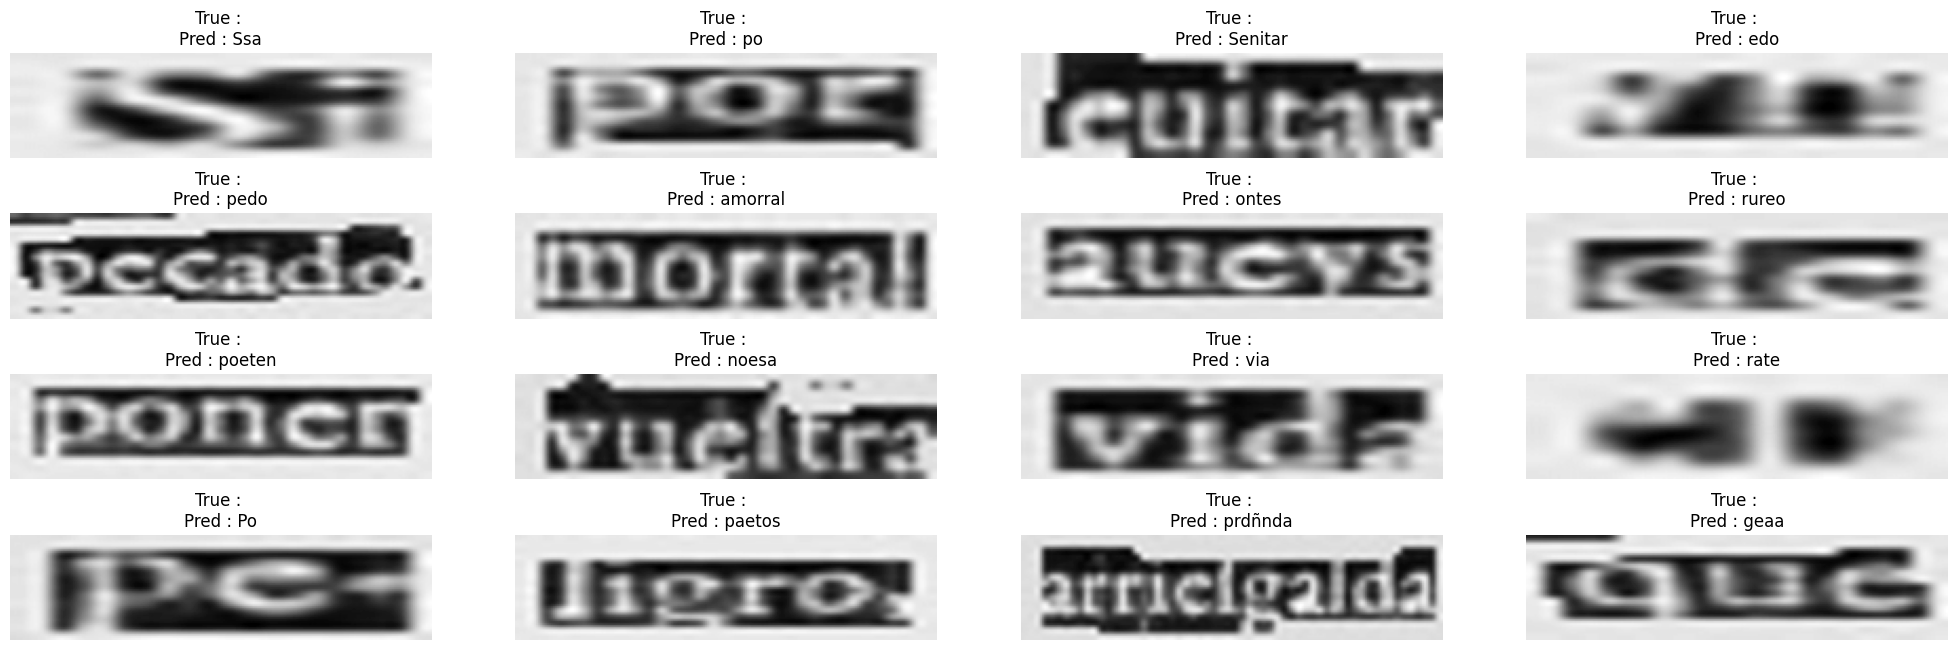

In [48]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

In [49]:
decoded_predictions = decode_pred(inference_model.predict(test_ds))

# Print decoded predictions in groups of 8 words per line
words_per_line = 8
for i in range(0, len(decoded_predictions), words_per_line):
    print(' '.join(decoded_predictions[i:i+words_per_line]))

54/54 [==============================] - 1s 16ms/step
Ssa po Senitar edo pedo amorral ontes rureo
poeten noesa via rate Po paetos prdñnda geaa
edo aldo mayon cade parle delsa poeseys Baereyr
mudraros metsa hariendo paa ste si rano recnte
canios safar pienientes o procpda difanddas boberamnen me
do sago Aeae ayqen cayon mno iri caros
Cecl aa Rete dad paes oos niio ar
angainpeva ara crnon qane vapdo abeia paro cantu
oos eseedados enceoras nue tan slce seer vas
hoeen exstanlo pes Eles oba casi uela pregeian
talten ana daio piia umzor comraron vervacen tu
negpos No a galas pritilios ma faeero p
ro fefdo hues Crttmo no amor recas gungy
toeoores sami ales Idas fite estimad conceda raes
Ca a protadas y aiee estlo ra ag
io se ao gaan ade corados l Rerges
vuv Ciys Saotad tros vusto var caojos lez
civos alar albly quta mior zea ceuvon llea
De sumitad lumitad simotos gacreela esetan al in
Dios si ranan Peen presada subo genna Parriaerda
Abraran ae hazted mas cono dexca aaad Sannto
hamte ponca gur